# Motivating Example

Jupyter Notebooks are frequently used to import, transform and visualize data. For example, the code below imports
population estimates for US States. It subsets the dataframe to California and graphs the result.

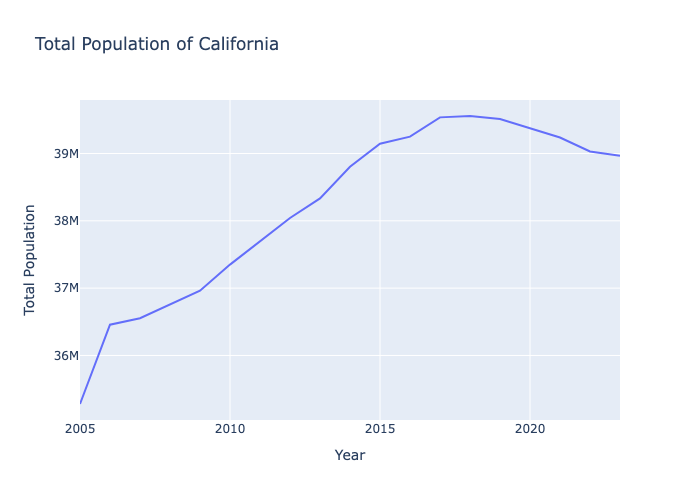

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Allows plotly plots to render interactively locally, but as static images when viewed in github.
# Without this the plotly images simply do not render in github.
pio.renderers.default = "vscode+png"

df = pd.read_csv("state_data.csv")

state = "California"
df_state = df[df["State"] == state]
px.line(df_state, x="Year", y="Total Population", title=f"Total Population of {state}")

## Another State

We can easily copy and paste the above code and tweak is slightly to graph the population of another state:

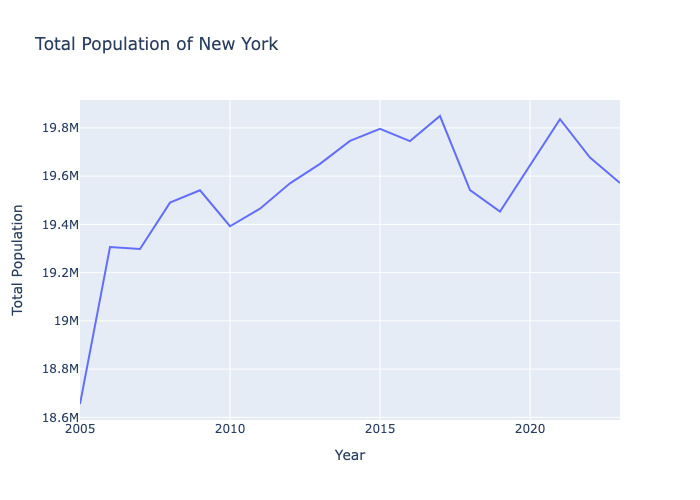

In [2]:
state = "New York"
df_state = df[df["State"] == state]
px.line(df_state, x="Year", y="Total Population", title=f"Total Population of {state}")

## Limitation

From a technical perspective, we could repeat this process for every state in the country. But from a practical perspective, people would have trouble keeping track of that many graphs. 

## An Alternative: Websites

One alternative is to build a website that lets users select a state and view its population data. This approach allows users to explore individual visualizations without being overwhelmed by too much information at once.

Streamlit makes it easy to create apps like this. In fact, the code for a Streamlit app often closely resembles the code used in the original notebook. Below is an example of how you might build the app described above. As you read through it, consider: which parts mirror the notebook code you've already seen, and which parts introduce something new?
```python
import streamlit as st
import pandas as pd
import plotly.express as px

df = pd.read_csv("state_data.csv")

# Let user select which state to graph
state = st.selectbox("State:", df["State"].unique())

# Create a graph of total population
df_state = df[df["State"] == state]
fig = px.line(
    df_state, x="Year", y="Total Population", title=f"Total Population of {state}"
)
st.plotly_chart(fig)
```